<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

### Load the data

In [5]:
# Load the data
from tensorflow.keras.datasets import boston_housing
import pandas as pd

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

boston_features = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_train = pd.DataFrame(X_train, columns=boston_features)
df_test = pd.DataFrame(X_test, columns=boston_features)

print(df_train.shape, df_test.shape)
print(y_train.shape, y_test.shape)

df_train.head()

(404, 13) (102, 13)
(404,) (102,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


[Boston Housing Features](http://lib.stat.cmu.edu/datasets/boston)

|Feature |Description|
|--------|-----------|
|CRIM    |per capita crime rate by town
|ZN      |proportion of residential land zoned for lots over 25,000 sq.ft.
|INDUS   |proportion of non-retail business acres per town
|CHAS    |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
|NOX     |nitric oxides concentration (parts per 10 million)
|RM      |average number of rooms per dwelling
|AGE     |proportion of owner-occupied units built prior to 1940
|DIS     |weighted distances to five Boston employment centres
|RAD     |index of accessibility to radial highways
|TAX     |full-value property-tax rate per \$10,000
|PTRATIO |pupil-teacher ratio by town
|B       |1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
|LSTAT   |% lower status of the population
|MEDV    |Median value of owner-occupied homes in $1000's

### Normalize the data

In [9]:
import numpy as np

def normalize_df(dataframe):
    df = dataframe.copy()
    df = df / np.amax(df, axis=0)
    return df

df_train_norm, df_test_norm = map(normalize_df, [df_train, df_test])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.013852,0.000,0.293439,0.0,0.617681,0.703954,0.917,0.371315,0.166667,0.431786,0.954545,1.000000,0.493021
1,0.000245,0.825,0.073180,0.0,0.476464,0.872206,0.157,0.585418,0.083333,0.489451,0.668182,0.996170,0.081907
2,0.055051,0.000,0.652487,0.0,0.724455,0.569628,1.000,0.124413,1.000000,0.936709,0.918182,0.946133,0.085857
3,0.000445,0.000,0.187094,0.0,0.591274,0.691920,0.345,0.558836,0.208333,0.315049,0.918182,1.000000,0.210956
4,0.041507,0.000,0.652487,0.0,0.818599,0.730774,0.884,0.239685,1.000000,0.936709,0.918182,0.986218,0.385831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002470,0.000,0.249099,0.0,0.514351,0.642063,0.620,0.568397,0.125000,0.327707,0.813636,1.000000,0.426653
400,0.001822,0.200,0.250901,0.0,0.532721,0.715186,0.163,0.413527,0.125000,0.313643,0.845455,1.000000,0.173558
401,0.000390,0.350,0.218457,0.0,0.502755,0.691232,0.233,0.620029,0.041667,0.427567,0.768182,0.912698,0.206215
402,0.024155,0.000,0.705840,0.0,1.000000,0.654327,0.985,0.151555,0.208333,0.566807,0.668182,0.659990,0.415855


### Import the type of model and layers that you will need from Keras.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Instantiate a model object and use model.add() to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task

In [13]:
model = Sequential(name='boston_housing_1')
model.add(Dense(26, input_shape=(13,), activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear'))

### Compile your model

In [14]:
model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

### Fit your model and report its accuracy in terms of Mean Squared Error

In [15]:
results = model.fit(df_train_norm, y_train, epochs=10)

Train on 404 samples
Epoch 1/10
404/404 [==============================] - 0s 1ms/sample - loss: 21.8955 - mae: 21.8955 - mse: 564.0706
Epoch 2/10
404/404 [==============================] - 0s 66us/sample - loss: 21.8220 - mae: 21.8220 - mse: 560.8524
Epoch 3/10
404/404 [==============================] - 0s 68us/sample - loss: 21.7213 - mae: 21.7213 - mse: 556.4487
Epoch 4/10
404/404 [==============================] - 0s 66us/sample - loss: 21.5609 - mae: 21.5609 - mse: 549.6400
Epoch 5/10
404/404 [==============================] - 0s 66us/sample - loss: 21.4373 - mae: 21.4373 - mse: 544.2737
Epoch 6/10
404/404 [==============================] - 0s 66us/sample - loss: 21.4029 - mae: 21.4029 - mse: 542.7341
Epoch 7/10
404/404 [==============================] - 0s 63us/sample - loss: 21.3976 - mae: 21.3976 - mse: 542.4888
Epoch 8/10
404/404 [==============================] - 0s 66us/sample - loss: 21.3964 - mae: 21.3964 - mse: 542.4341
Epoch 9/10
404/404 [==============================] 

In [30]:
loss, mae, mse = model.evaluate(df_test_norm, y_test, verbose=1)
print(f'Neural network test mean squared error: {mse:.2f} in dollars^2 units')
print(f'Neural network test mean absolute error: ${mae:.2f}')

102/102 [==============================] - 0s 81us/sample - loss: 22.0790 - mae: 22.0790 - mse: 570.7308
Neural network test mean squared error: 570.73 in dollars^2 units
Neural network test mean absolute error: $22.08


### Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline

def plot_history(history, epochs, figsize=(8, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=pd.DataFrame(history), ax=ax)
    plt.title('Neural Network History: Loss and Metrics by Epoch')
    plt.xlim(0, epochs - 1)
    plt.xlabel('Epochs')
    plt.show()

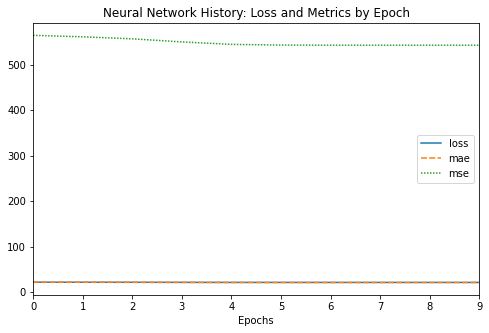

In [37]:
plot_history(results.history, epochs=10)

### Run this same data through a linear regression model. Which achieves higher accuracy?

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression(n_jobs=-2)
y_pred = lin_reg.fit(df_train_norm, y_train).predict(df_test_norm)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print(f'Linear Regression mean squared error: {mse_lr:.2f} in dollars^2 units')
print(f'Linear Regression mean absolute error: ${mae_lr:.2f}')

Linear Regression mean squared error: 27.65 in dollars^2 units
Linear Regression mean absolut error: $3.84


Linear Regression outperformed my neural network by a lagre margin

### Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)

In [32]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [31]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


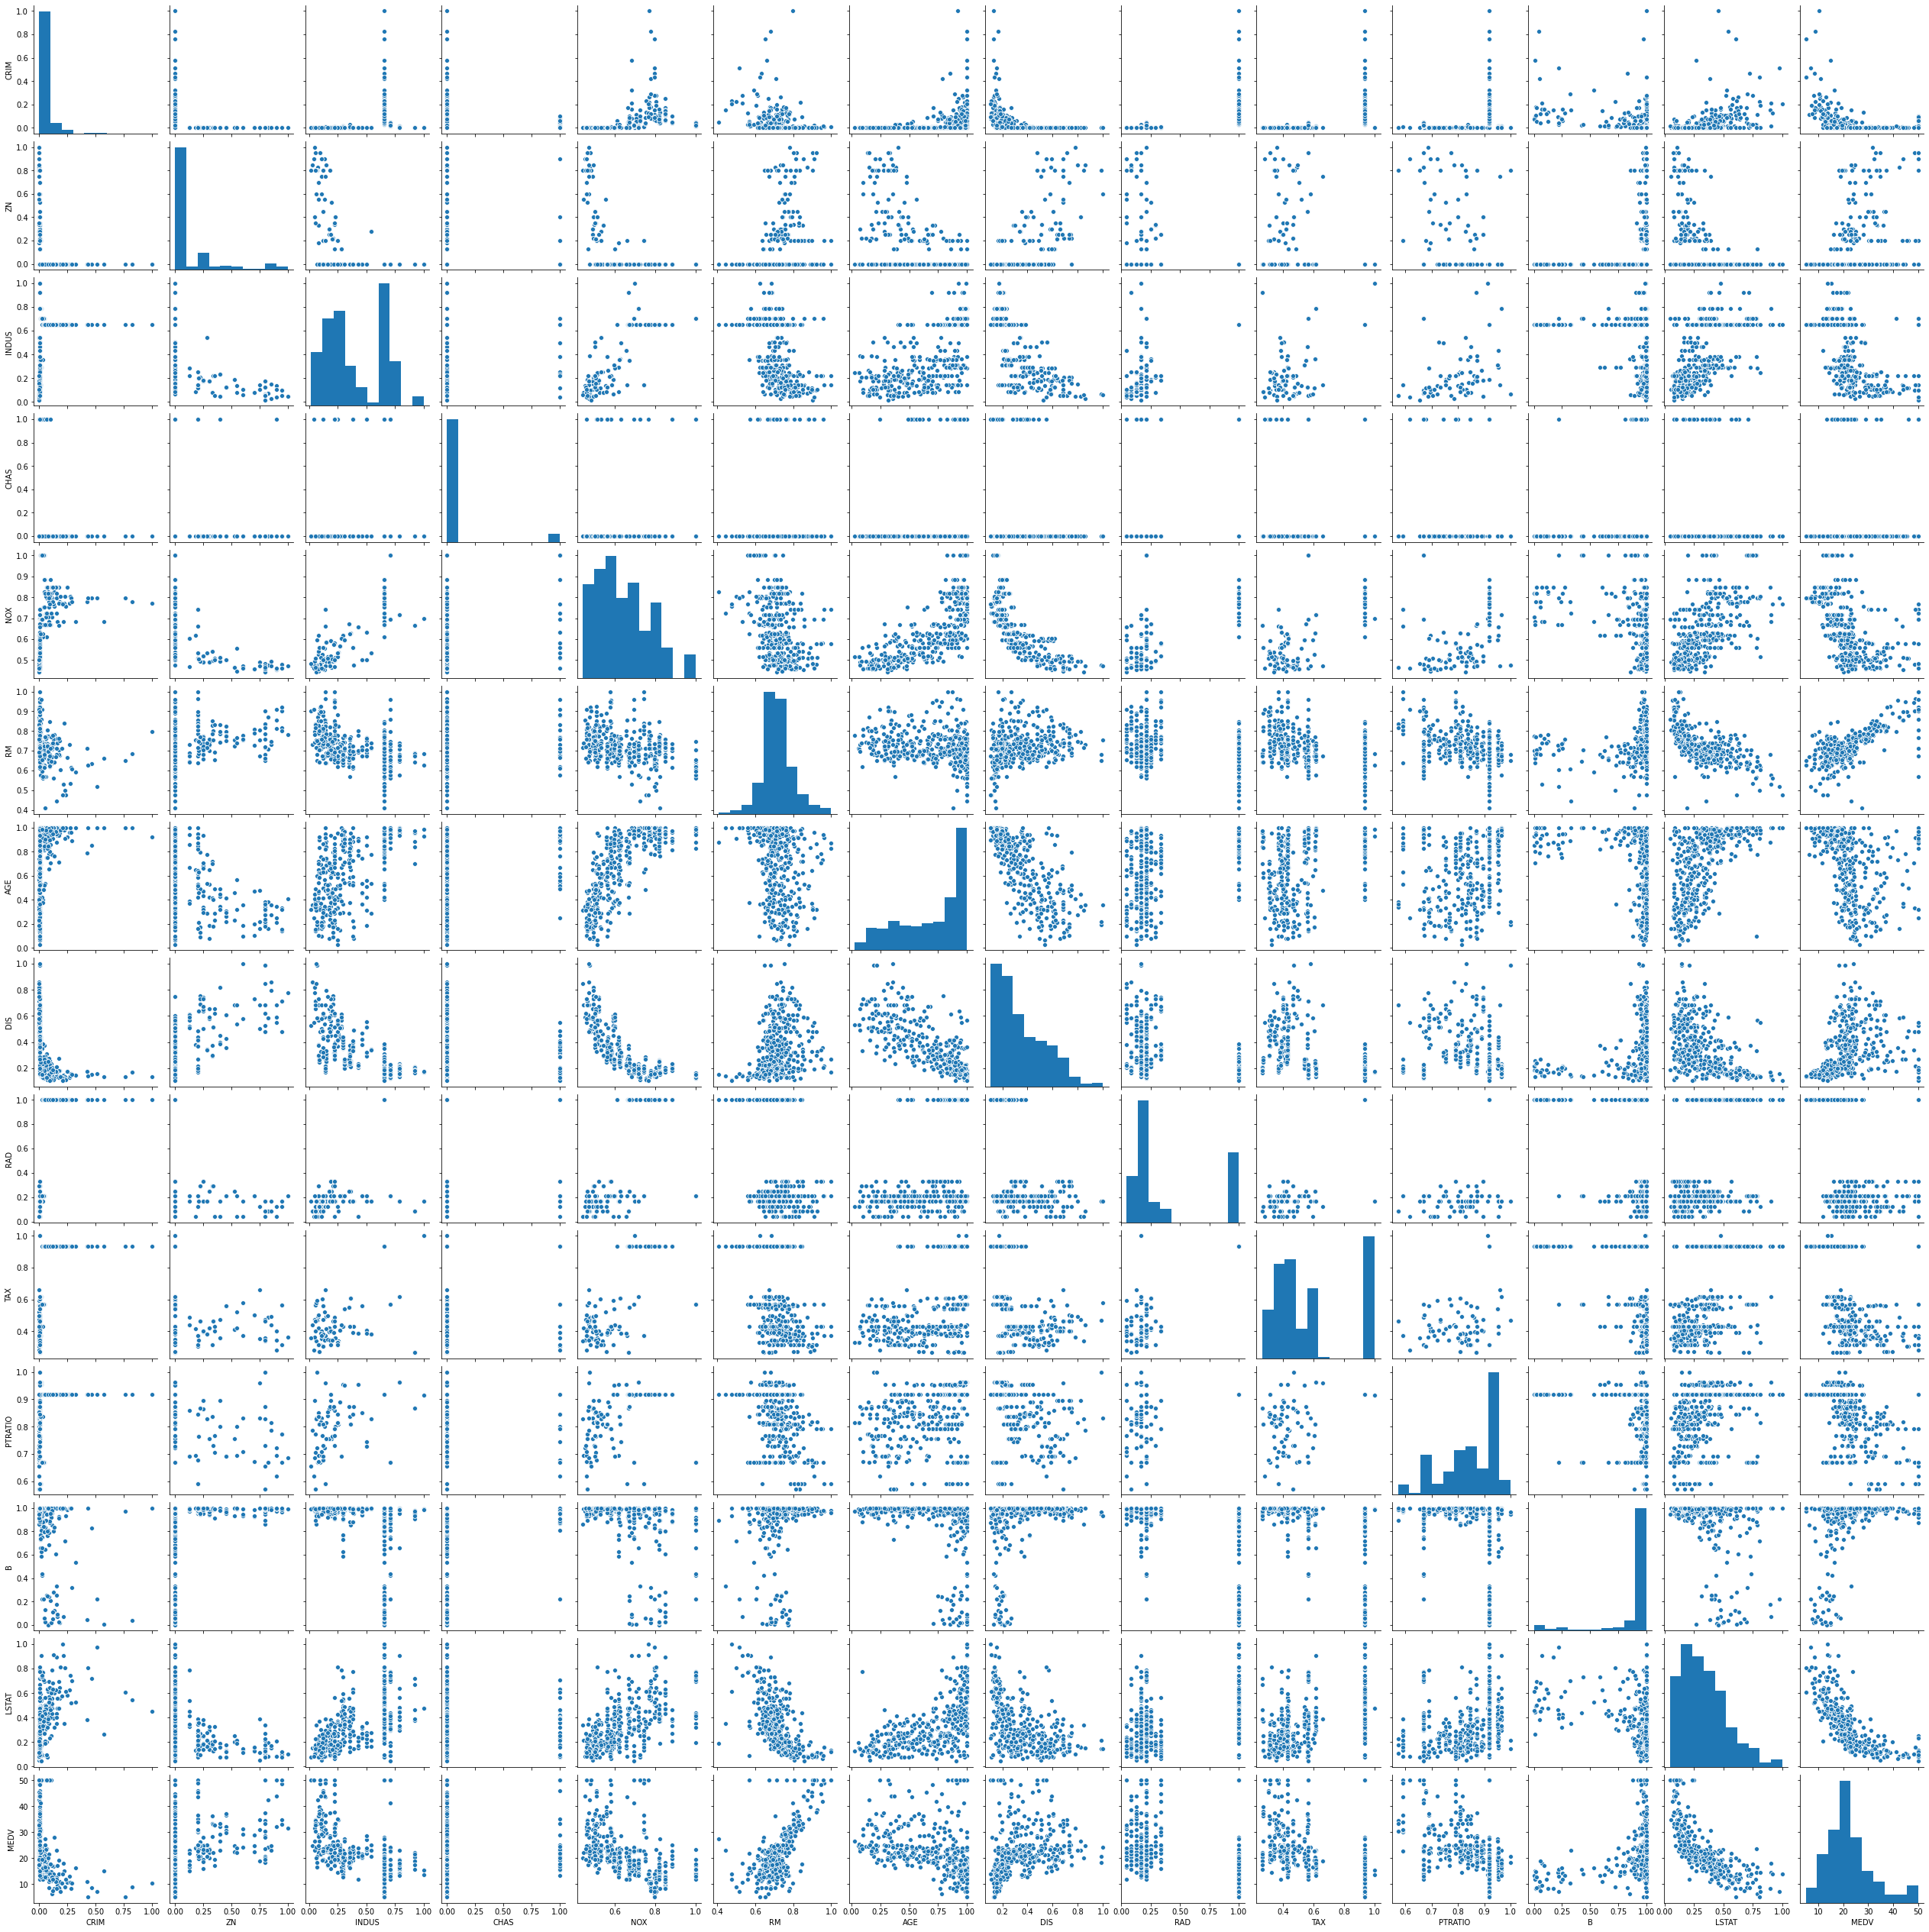

In [38]:
df_2_plot = df_train_norm.copy()
df_2_plot['MEDV'] = y_train
sns.pairplot(df_2_plot);

In [46]:
def wrangle(dataframe):
    df = dataframe.copy()
    
    df = df.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO'])
    
    return df

In [47]:
# Load the data
df_train_norm_engineered, df_test_norm_engineered = map(normalize_df, map(wrangle, [df_train, df_test]))
df_train_norm_engineered.shape, df_test_norm_engineered.shape

((404, 5), (102, 5))

In [49]:
# Define model
model2 = Sequential(name='boston_housing_1')
model2.add(Dense(26, input_shape=(5,), activation='relu'))
model2.add(Dense(52, activation='relu'))
model2.add(Dense(26, activation='relu'))
model2.add(Dense(13, activation='relu'))
model2.add(Dense(1, activation='linear'))

# Compiole model
model2.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

# Fit model
results2 = model2.fit(df_train_norm_engineered, y_train, epochs=10)

lin_reg2 = LinearRegression(n_jobs=-2).fit(df_train_norm_engineered, y_train)

Train on 404 samples
Epoch 1/10
404/404 [==============================] - 0s 1ms/sample - loss: 21.7284 - mae: 21.7284 - mse: 556.1036
Epoch 2/10
404/404 [==============================] - 0s 66us/sample - loss: 20.4946 - mae: 20.4946 - mse: 504.2935
Epoch 3/10
404/404 [==============================] - 0s 68us/sample - loss: 18.0718 - mae: 18.0718 - mse: 408.9994
Epoch 4/10
404/404 [==============================] - 0s 67us/sample - loss: 13.0985 - mae: 13.0985 - mse: 251.9319
Epoch 5/10
404/404 [==============================] - 0s 67us/sample - loss: 7.1325 - mae: 7.1325 - mse: 103.8060
Epoch 6/10
404/404 [==============================] - 0s 68us/sample - loss: 6.4816 - mae: 6.4816 - mse: 79.4353
Epoch 7/10
404/404 [==============================] - 0s 68us/sample - loss: 6.0245 - mae: 6.0245 - mse: 80.5422
Epoch 8/10
404/404 [==============================] - 0s 69us/sample - loss: 5.7633 - mae: 5.7633 - mse: 72.4858
Epoch 9/10
404/404 [==============================] - 0s 66us/s

### After feature engineering, which model sees a greater accuracy boost due to the new features?

After removing several features, the neural network improved by quite a lot.
> Neural network test mean squared error: 570.73 in dollars^2 units
>
> Neural network test mean absolute error: \$22.08

> Neural network test mean squared error: 70.87 in dollars^2 units
>
> Neural network test mean absolute error: \$5.88

The linear regression model improved slightly and still outperformed the neural network.
> Linear Regression mean squared error: 27.65 in dollars^2 units
> 
> Linear Regression mean absolute error: \$3.84

> Linear Regression mean squared error: 24.66 in dollars^2 units
>
> Linear Regression mean absolute error: \$3.58

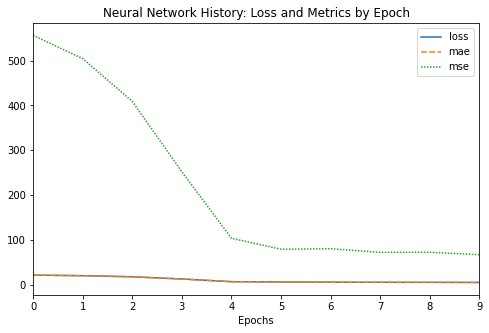

102/102 [==============================] - 0s 77us/sample - loss: 5.8820 - mae: 5.8820 - mse: 70.8677
Neural network test mean squared error: 70.87 in dollars^2 units
Neural network test mean absolute error: $5.88
Linear Regression mean squared error: 24.66 in dollars^2 units
Linear Regression mean absolute error: $3.58


In [52]:
# Evaluate model
plot_history(results2.history, epochs=10)

loss2, mae2, mse2 = model2.evaluate(df_test_norm_engineered, y_test, verbose=1)
print(f'Neural network test mean squared error: {mse2:.2f} in dollars^2 units')
print(f'Neural network test mean absolute error: ${mae2:.2f}')

y_pred2 = lin_reg2.predict(df_test_norm_engineered)

mse_lr2 = mean_squared_error(y_test, y_pred2)
mae_lr2 = mean_absolute_error(y_test, y_pred2)

print(f'Linear Regression mean squared error: {mse_lr2:.2f} in dollars^2 units')
print(f'Linear Regression mean absolute error: ${mae_lr2:.2f}')

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

### Load and preprocess the image data similar to how we preprocessed the MNIST data in class.

In [63]:
# Load the data
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [64]:
def normalize_fashion(data):
    return data / 255

In [65]:
X_train_norm, X_test_norm = map(normalize_fashion, [X_train, X_test])

### Make sure to one-hot encode your category labels

In [66]:
from tensorflow.keras.utils import to_categorical

def encode_classes(classes):
    return to_categorical(classes, num_classes=len(np.unique(classes)))

In [67]:
y_train_encoded, y_test_encoded = map(encode_classes, [y_train, y_test])

### The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.

In [78]:
from tensorflow.keras.layers import Flatten

# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Fit model
results = model.fit(X_train_norm, y_train_encoded, epochs=10)

# Evaluate model
loss, accuracy = model.evaluate(X_test_norm, y_test_encoded)

print(f'Neural network test accuracy: {accuracy * 100:.2f}%')

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5993 - accuracy: 0.7986
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4618 - accuracy: 0.8417
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4363 - accuracy: 0.8497
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4222 - accuracy: 0.8544
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4131 - accuracy: 0.8577
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4057 - accuracy: 0.8595
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4021 - accuracy: 0.8597
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3983 - accuracy: 0.8621
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3953 - accuracy: 0.8636
Epoch 10/10
10

### Try different hyperparameters. 
What is the highest accuracy that you are able to achieve.

In [80]:
def fit_evaluate_model(model):
    # Fit model
    results = model.fit(X_train_norm, y_train_encoded, epochs=10)

    print('\nEvaluating test set.\n')
    
    # Evaluate model
    loss, accuracy = model.evaluate(X_test_norm, y_test_encoded)

    print(f'Neural network test accuracy: {accuracy * 100:.2f}%')
    
    return results

In [81]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

results_etra_layer = fit_evaluate_model(model)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5125 - accuracy: 0.8221
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3856 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3468 - accuracy: 0.8734
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3252 - accuracy: 0.8819
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3062 - accuracy: 0.8878
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2898 - accuracy: 0.8933
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2774 - accuracy: 0.8978
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2671 - accuracy: 0.9011
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2558 - accuracy: 0.9049
Epoch 10/10
60

In [82]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

results_extra_layer_nadam = fit_evaluate_model(model)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4955 - accuracy: 0.8254
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3711 - accuracy: 0.8666
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3323 - accuracy: 0.8788
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3090 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2922 - accuracy: 0.8925
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2773 - accuracy: 0.8975
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2645 - accuracy: 0.9015
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2548 - accuracy: 0.9062
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2473 - accuracy: 0.9092
Epoch 10/10
60

In [83]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

results_4layers_nadam = fit_evaluate_model(model)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.7380 - accuracy: 0.7308
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4861 - accuracy: 0.8300
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4487 - accuracy: 0.8434
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4292 - accuracy: 0.8493
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4169 - accuracy: 0.8525
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4088 - accuracy: 0.8541
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4020 - accuracy: 0.8566
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3965 - accuracy: 0.8595
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3920 - accuracy: 0.8610
Epoch 10/10
60

In [84]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

results_5layers_nadam = fit_evaluate_model(model)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5765 - accuracy: 0.7910
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4255 - accuracy: 0.8458
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3943 - accuracy: 0.8565
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3793 - accuracy: 0.8618
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3686 - accuracy: 0.8655
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3593 - accuracy: 0.8684
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3516 - accuracy: 0.8705
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3448 - accuracy: 0.8729
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3376 - accuracy: 0.8747
Epoch 10/10
60

In [85]:
# Define model
model = Sequential(name='Fashion-MNIST')
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

results_3_big_layers_nadam = fit_evaluate_model(model)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4818 - accuracy: 0.8292
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3585 - accuracy: 0.8688
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3215 - accuracy: 0.8810
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2991 - accuracy: 0.8900
Epoch 5/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2827 - accuracy: 0.8946
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2677 - accuracy: 0.8998
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2581 - accuracy: 0.9023
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2457 - accuracy: 0.9072
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2392 - accuracy: 0.9089
Epoch 10/10
60

### Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

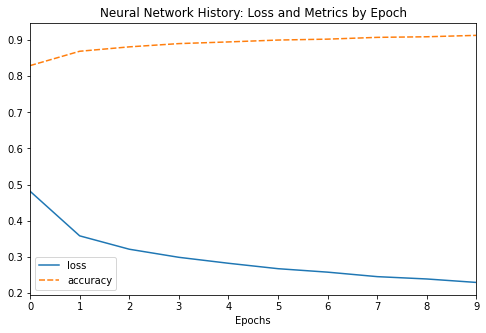

In [86]:
plot_history(results_3_big_layers_nadam.history, epochs=10)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.